In [2]:
import pandas as pd
path = "/Users/a.kryazhenkov/test/other/itmo/data-analysis/transaction_fraud_data.parquet"
df_trans = pd.read_parquet(path)

In [4]:
df_trans.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [6]:
df_trans["channel"].value_counts()

channel
web       4563141
mobile    2269578
pos        651047
Name: count, dtype: int64

In [9]:
df_trans[["channel", "is_fraud"]].groupby("channel")["is_fraud"].mean()

channel
mobile    0.123878
pos       1.000000
web       0.123275
Name: is_fraud, dtype: float64

# eda

ЗАГРУЗКА ДАННЫХ
Загрузка transaction_fraud_data.parquet...
Загрузка historical_currency_exchange.parquet...

Транзакции: 7483766 строк, 23 колонок
Курсы валют: 31 строк, 12 колонок

БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ

1. ИНФОРМАЦИЯ О ТРАНЗАКЦИЯХ:
----------------------------------------

Первые 5 строк:
  transaction_id customer_id       card_number                  timestamp  \
0    TX_a0ad2a2a  CUST_72886  6646734767813109 2024-09-30 00:00:01.034820   
1    TX_3599c101  CUST_70474   376800864692727 2024-09-30 00:00:01.764464   
2    TX_a9461c6d  CUST_10715  5251909460951913 2024-09-30 00:00:02.273762   
3    TX_7be21fc4  CUST_16193   376079286931183 2024-09-30 00:00:02.297466   
4    TX_150f490b  CUST_87572  6172948052178810 2024-09-30 00:00:02.544063   

  vendor_category vendor_type          vendor     amount currency    country  \
0      Restaurant   fast_food       Taco Bell     294.87      GBP         UK   
1   Entertainment      gaming           Steam    3368.97      BRL     Brazil   

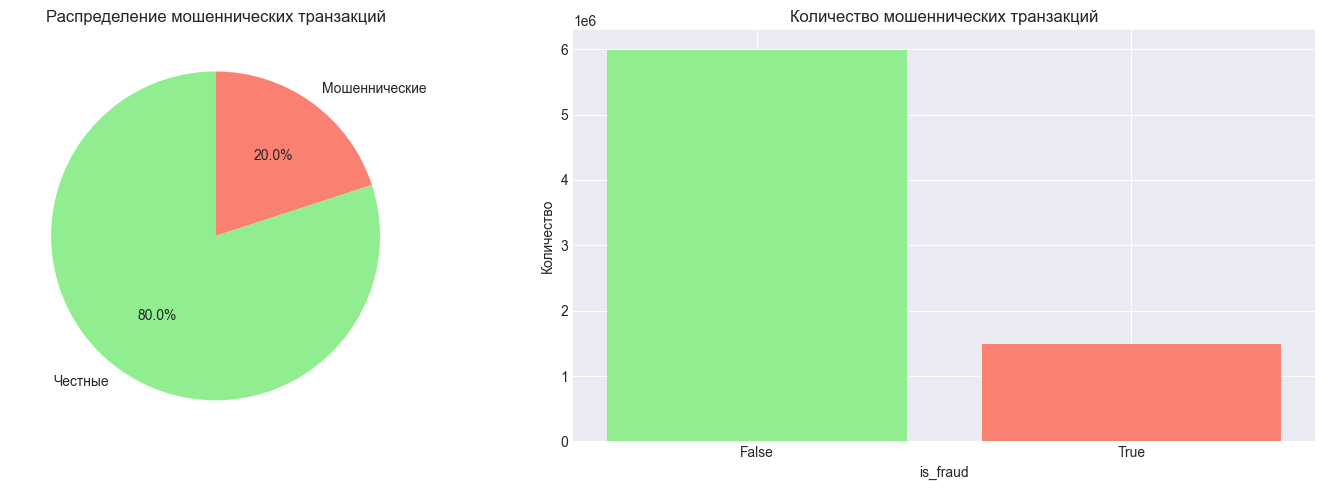


2. РАСПРЕДЕЛЕНИЕ СУММЫ ТРАНЗАКЦИЙ:
----------------------------------------


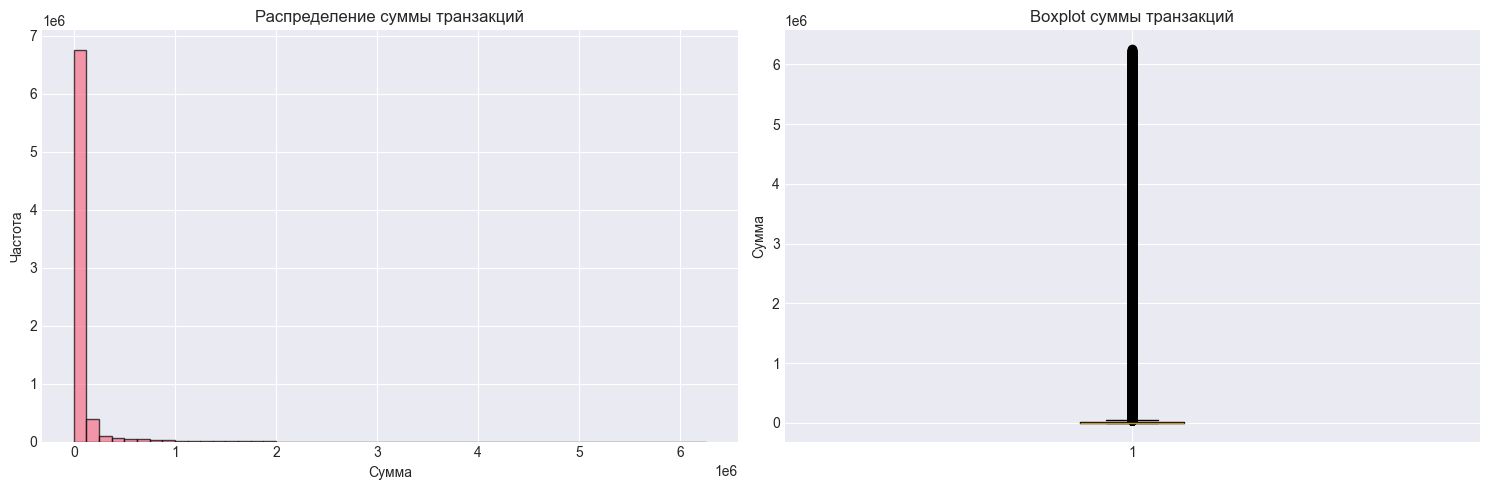

Средняя сумма честных транзакций: 30242.54
Средняя сумма мошеннических транзакций: 118773.59
Медиана честных транзакций: 903.51
Медиана мошеннических транзакций: 5626.06

3. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:
----------------------------------------


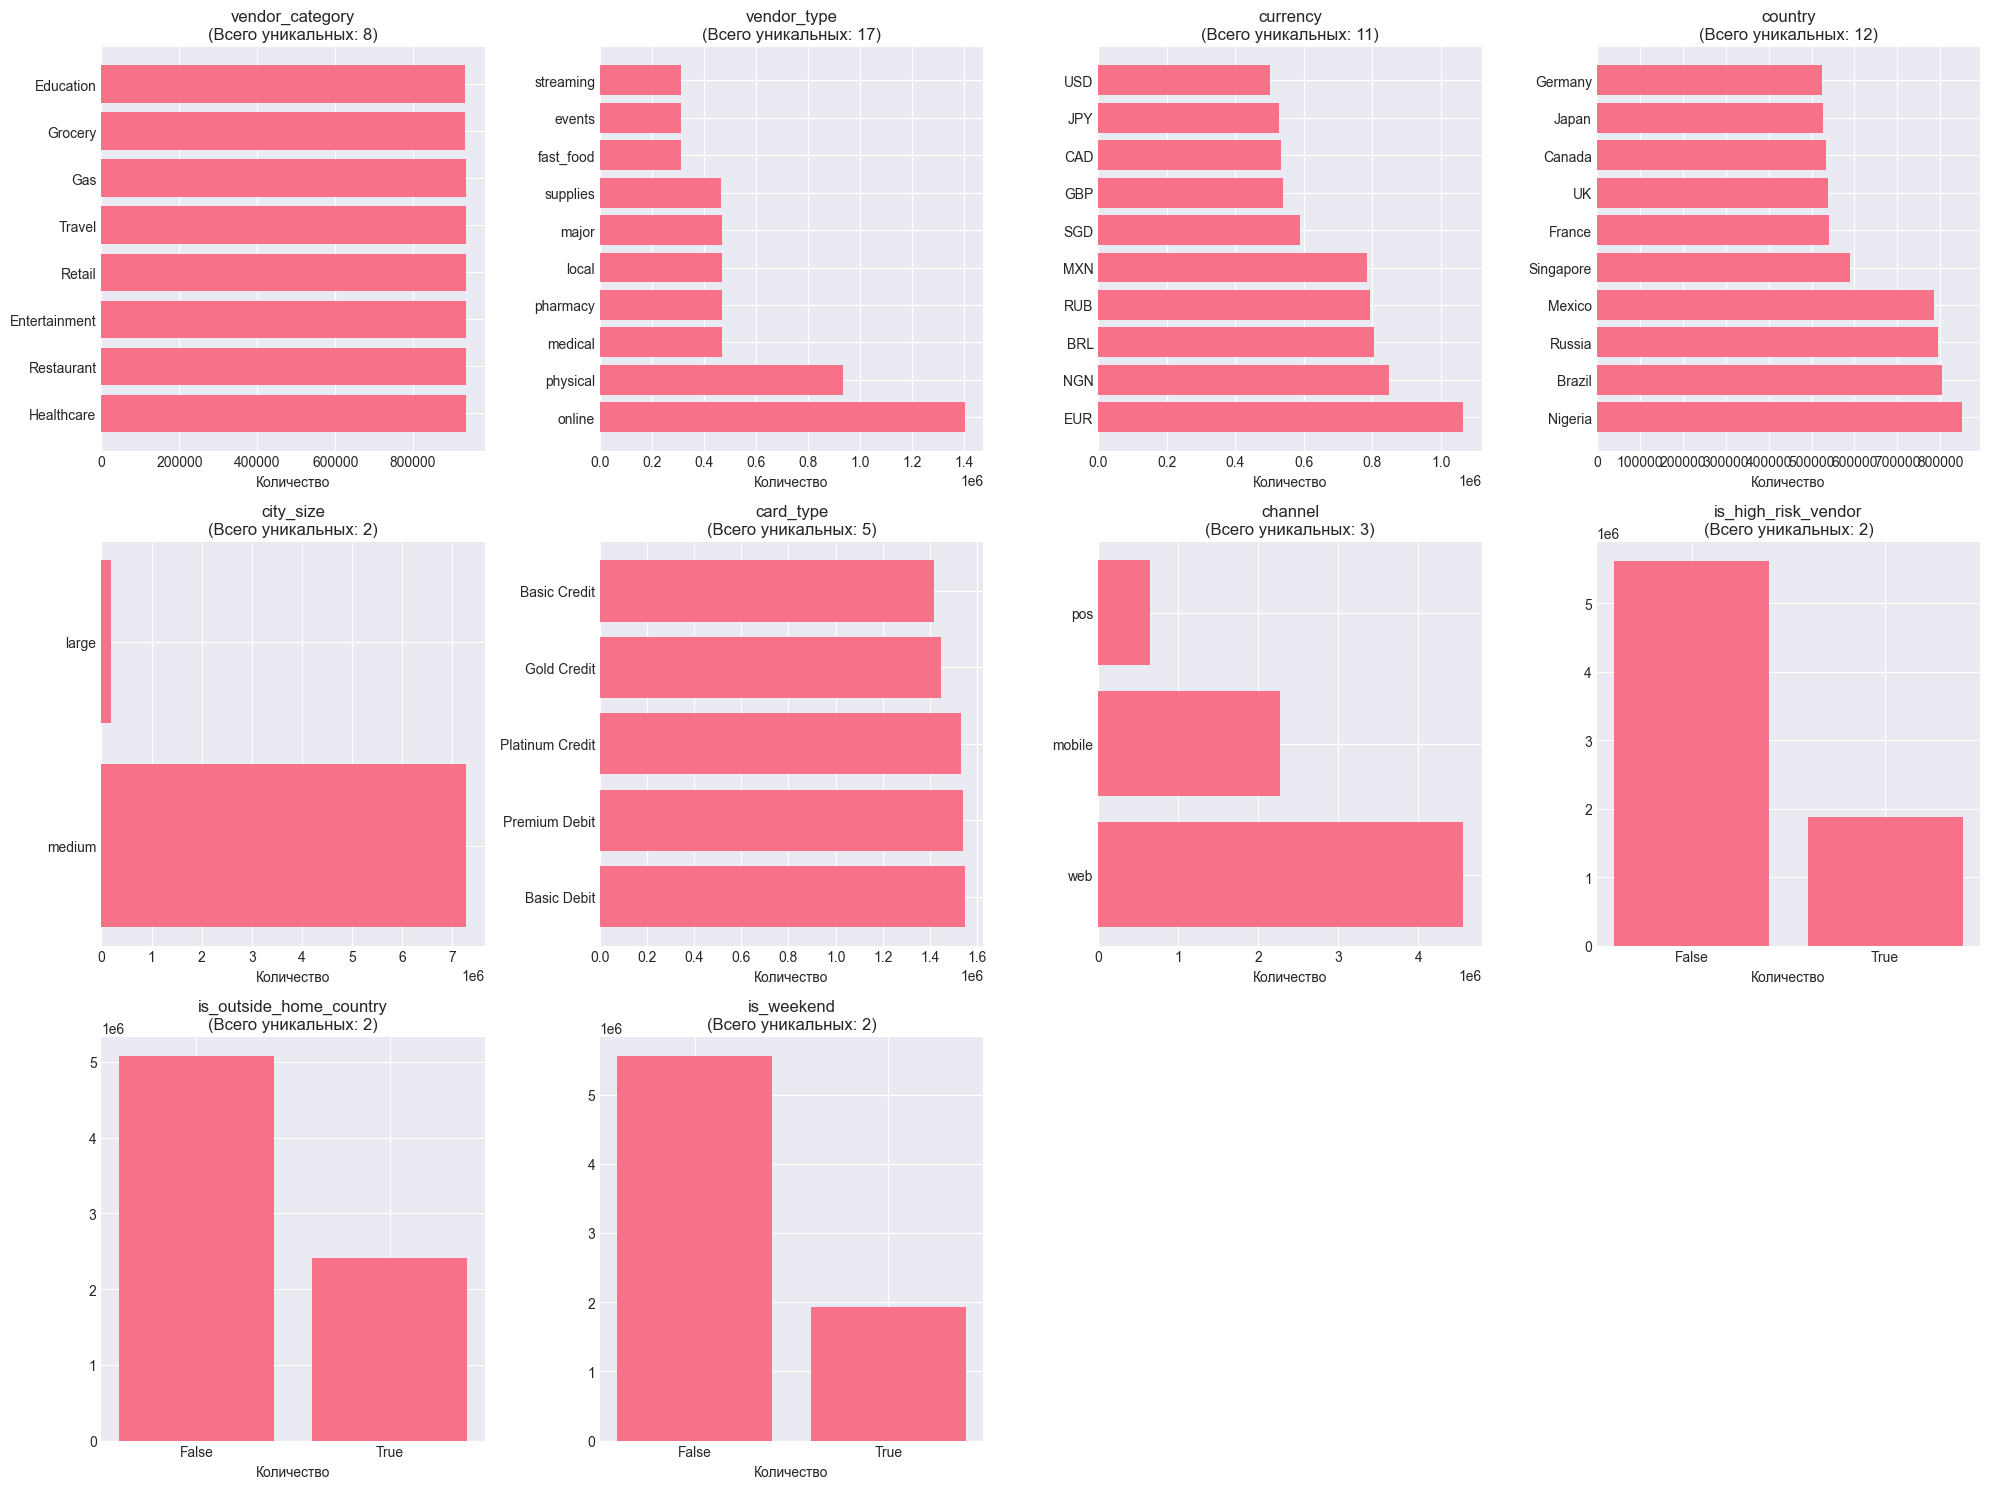


4. АНАЛИЗ ПО ВРЕМЕНИ:
----------------------------------------


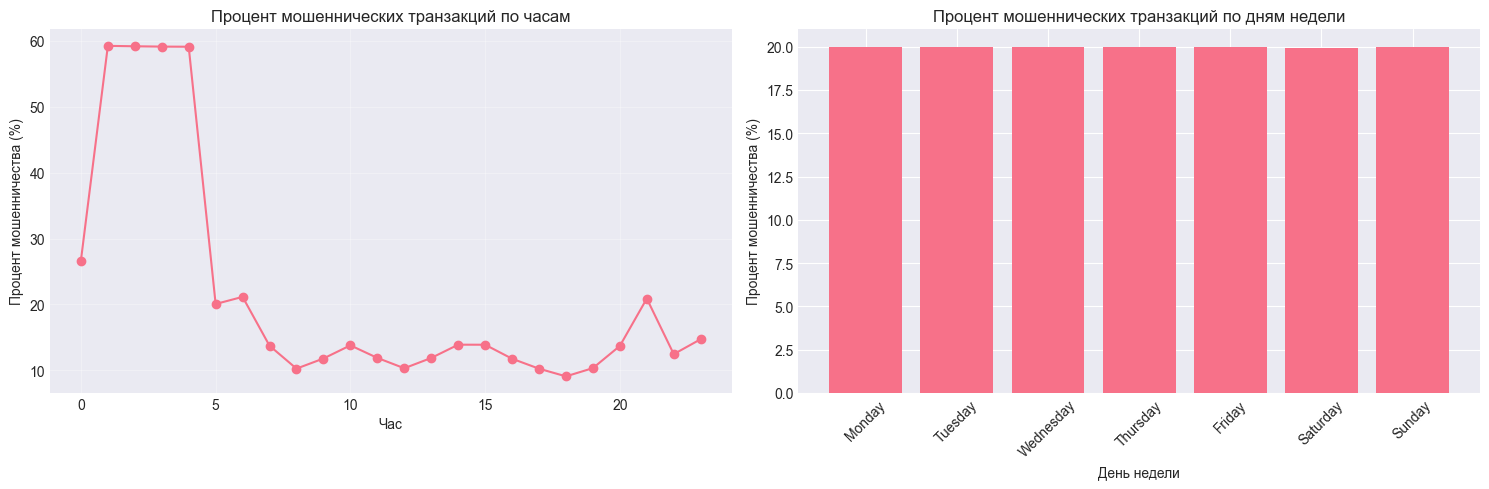


АНАЛИЗ ОБМЕННЫХ КУРСОВ

1. СТАТИСТИКА ПО ВАЛЮТАМ:
----------------------------------------
Валюта     Среднее     Медиана         Мин        Макс       Std
   AUD    1.486451    1.487595    1.442917    1.522229  0.021309
   BRL    5.599606    5.625377    5.425444    5.761654  0.104725
   CAD    1.373282    1.377943    1.348063    1.390965  0.013313
   EUR    0.916183    0.916792    0.895591    0.927316  0.008551
   GBP    0.764806    0.765915    0.746956    0.773928  0.006681
   JPY  149.313721  149.168474  142.573268  153.800613  2.686216
   MXN   19.650422   19.694724   19.263497   20.048756  0.283454
   NGN 1640.017070 1639.315783 1619.450022 1670.694524 15.192761
   RUB   96.003479   95.922769   92.898519   97.501463  1.073514
   SGD    1.308041    1.308048    1.280156    1.324596  0.011290
   USD    1.000000    1.000000    1.000000    1.000000  0.000000

2. ДИНАМИКА КУРСОВ ВАЛЮТ:
----------------------------------------


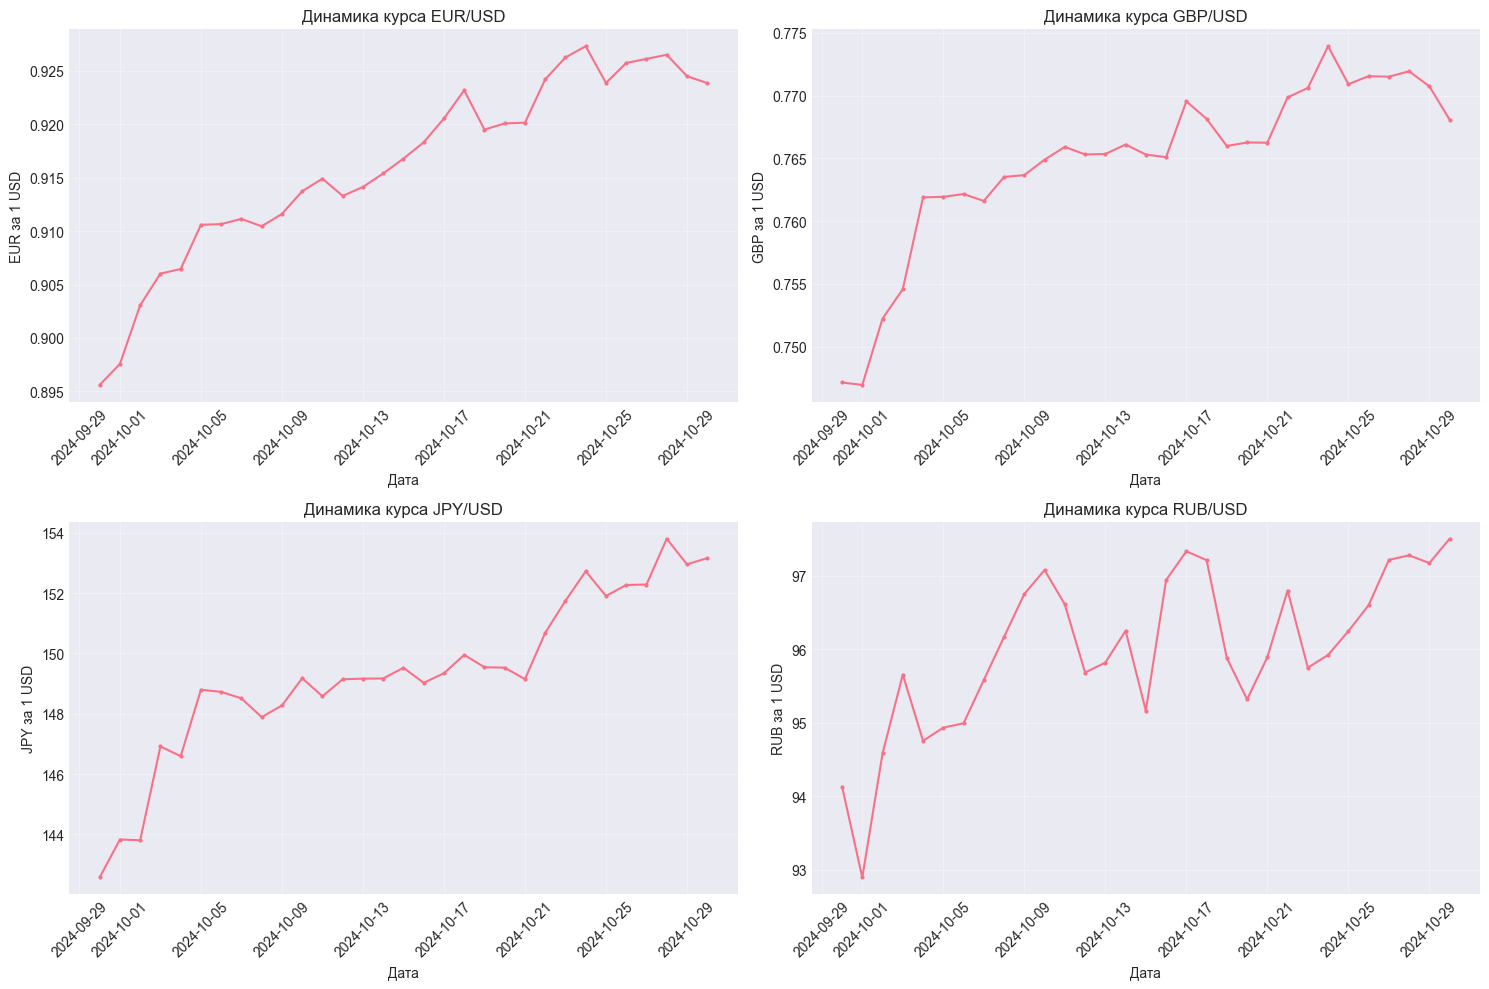


3. КОРРЕЛЯЦИЯ МЕЖДУ ВАЛЮТАМИ:
----------------------------------------


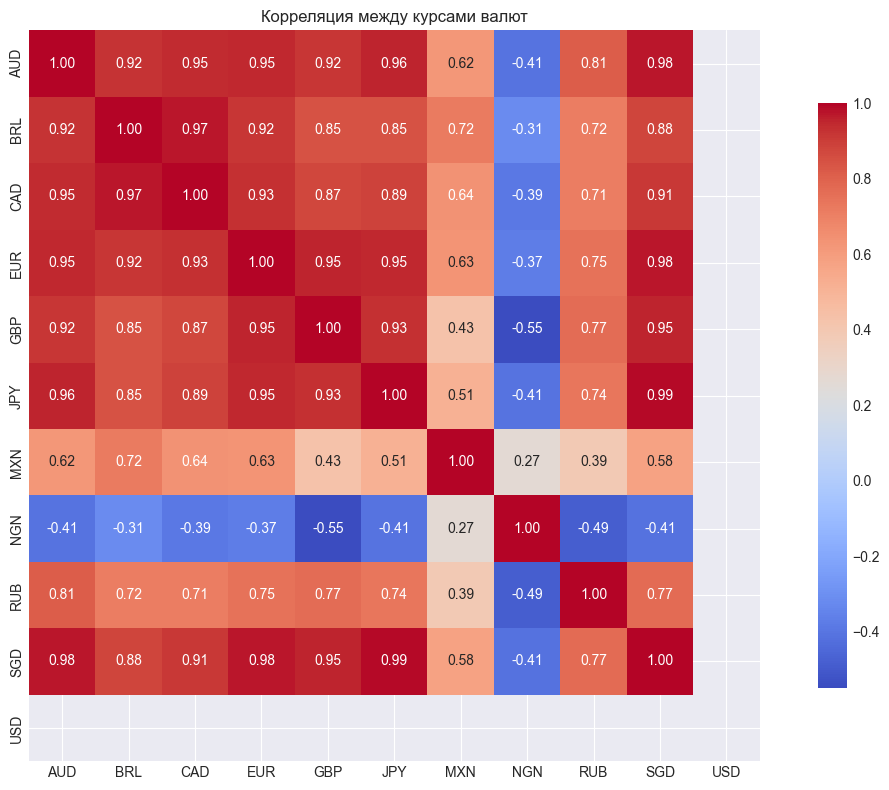


АНАЛИЗ АКТИВНОСТИ ЗА ПОСЛЕДНИЙ ЧАС

Статистика активности за последний час:
----------------------------------------
       last_hour_num_transactions  last_hour_total_amount  \
count                7.483766e+06            7.483766e+06   
mean                 4.091429e+02            1.991719e+07   
std                  3.910964e+02            3.565890e+07   
min                  0.000000e+00            1.454232e-02   
25%                  1.050000e+02            3.367823e+06   
50%                  2.920000e+02            1.017851e+07   
75%                  6.060000e+02            2.273432e+07   
max                  3.962000e+03            1.072915e+09   

       last_hour_unique_merchants  last_hour_unique_countries  \
count                7.483766e+06                7.483766e+06   
mean                 8.002226e+01                1.066260e+01   
std                  3.047287e+01                2.617777e+00   
min                  0.000000e+00                0.000000e+00   
25%    

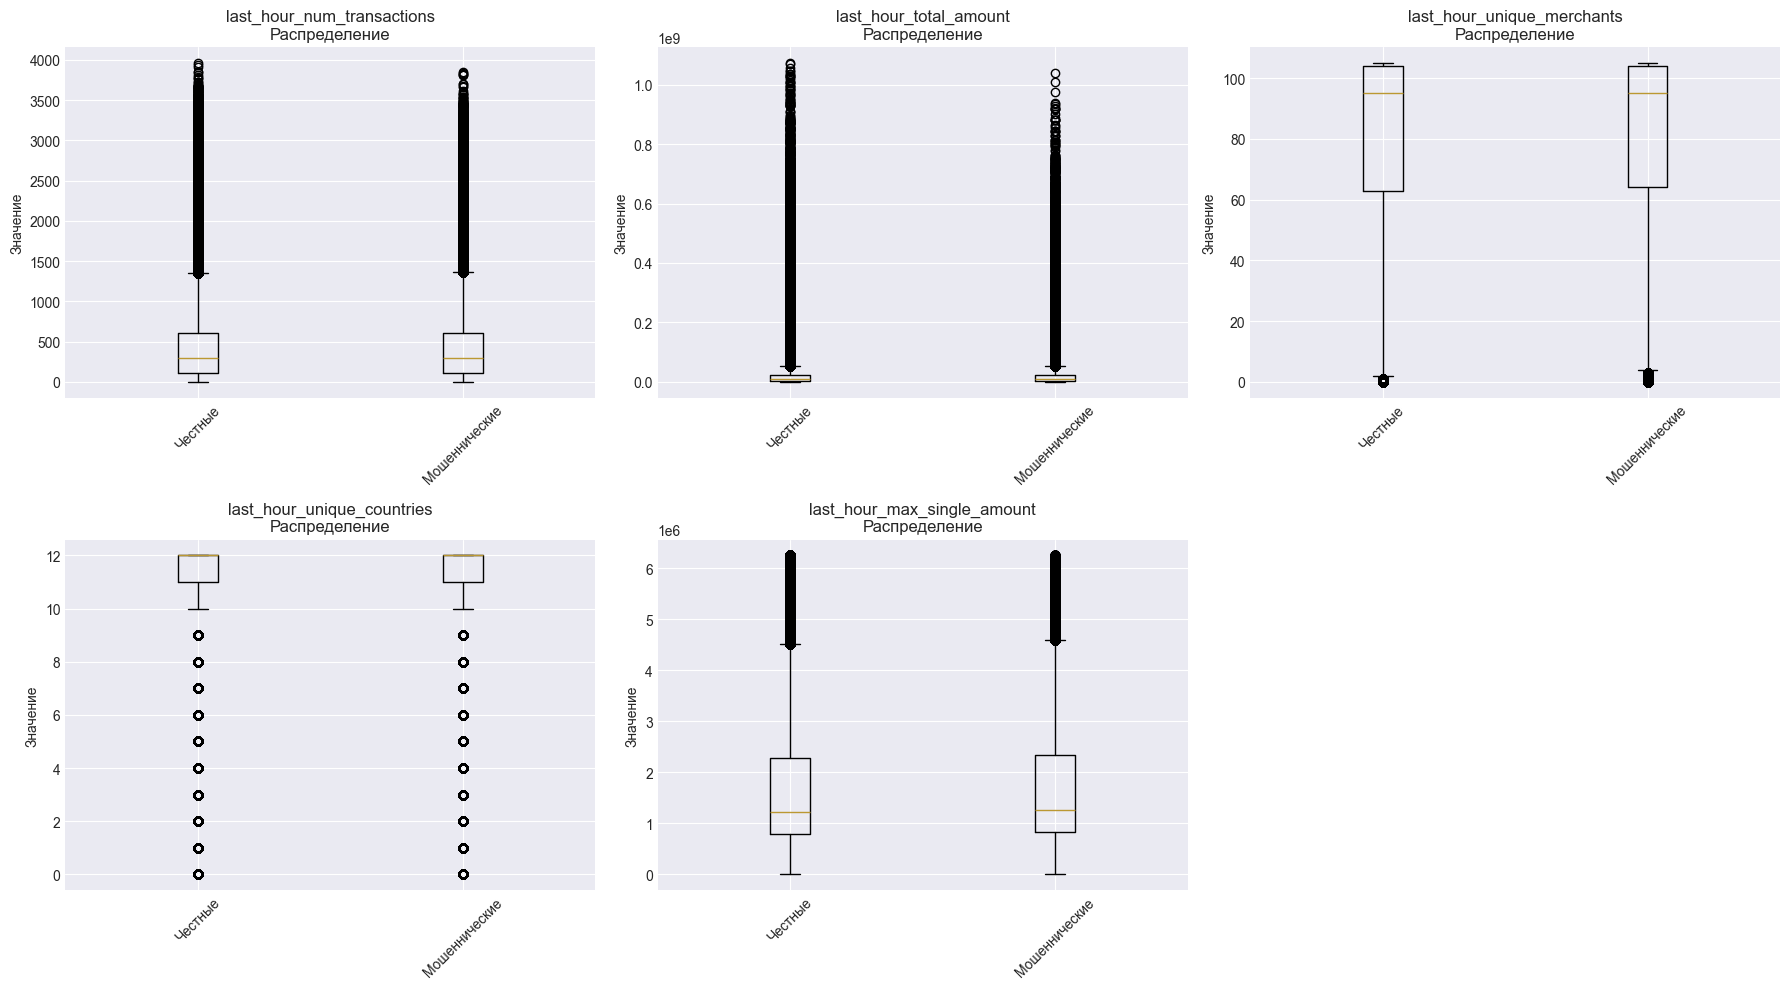


АНАЛИЗ ПАТТЕРНОВ МОШЕННИЧЕСТВА

1. МОШЕННИЧЕСТВО ПО КАТЕГОРИЯМ ВЕНДОРОВ:
----------------------------------------

Топ категорий по проценту мошенничества:
                      mean   count
vendor_category                   
Travel           20.034089  935790
Grocery          20.019400  934029
Gas              19.973145  935401
Restaurant       19.969600  936178
Entertainment    19.963191  936173
Education        19.945862  933542
Retail           19.939779  935883
Healthcare       19.937551  936770


2. МОШЕННИЧЕСТВО ПО ТИПУ КАРТЫ:
----------------------------------------
                      mean    count
card_type                          
Basic Credit     19.974157  1415469
Platinum Credit  19.973086  1533013
Gold Credit      19.972914  1447260
Premium Debit    19.972059  1539661
Basic Debit      19.971996  1548363


3. МОШЕННИЧЕСТВО ПО КАНАЛУ:
----------------------------------------
               mean    count
channel                     
pos      100.000000   651047
mobile  

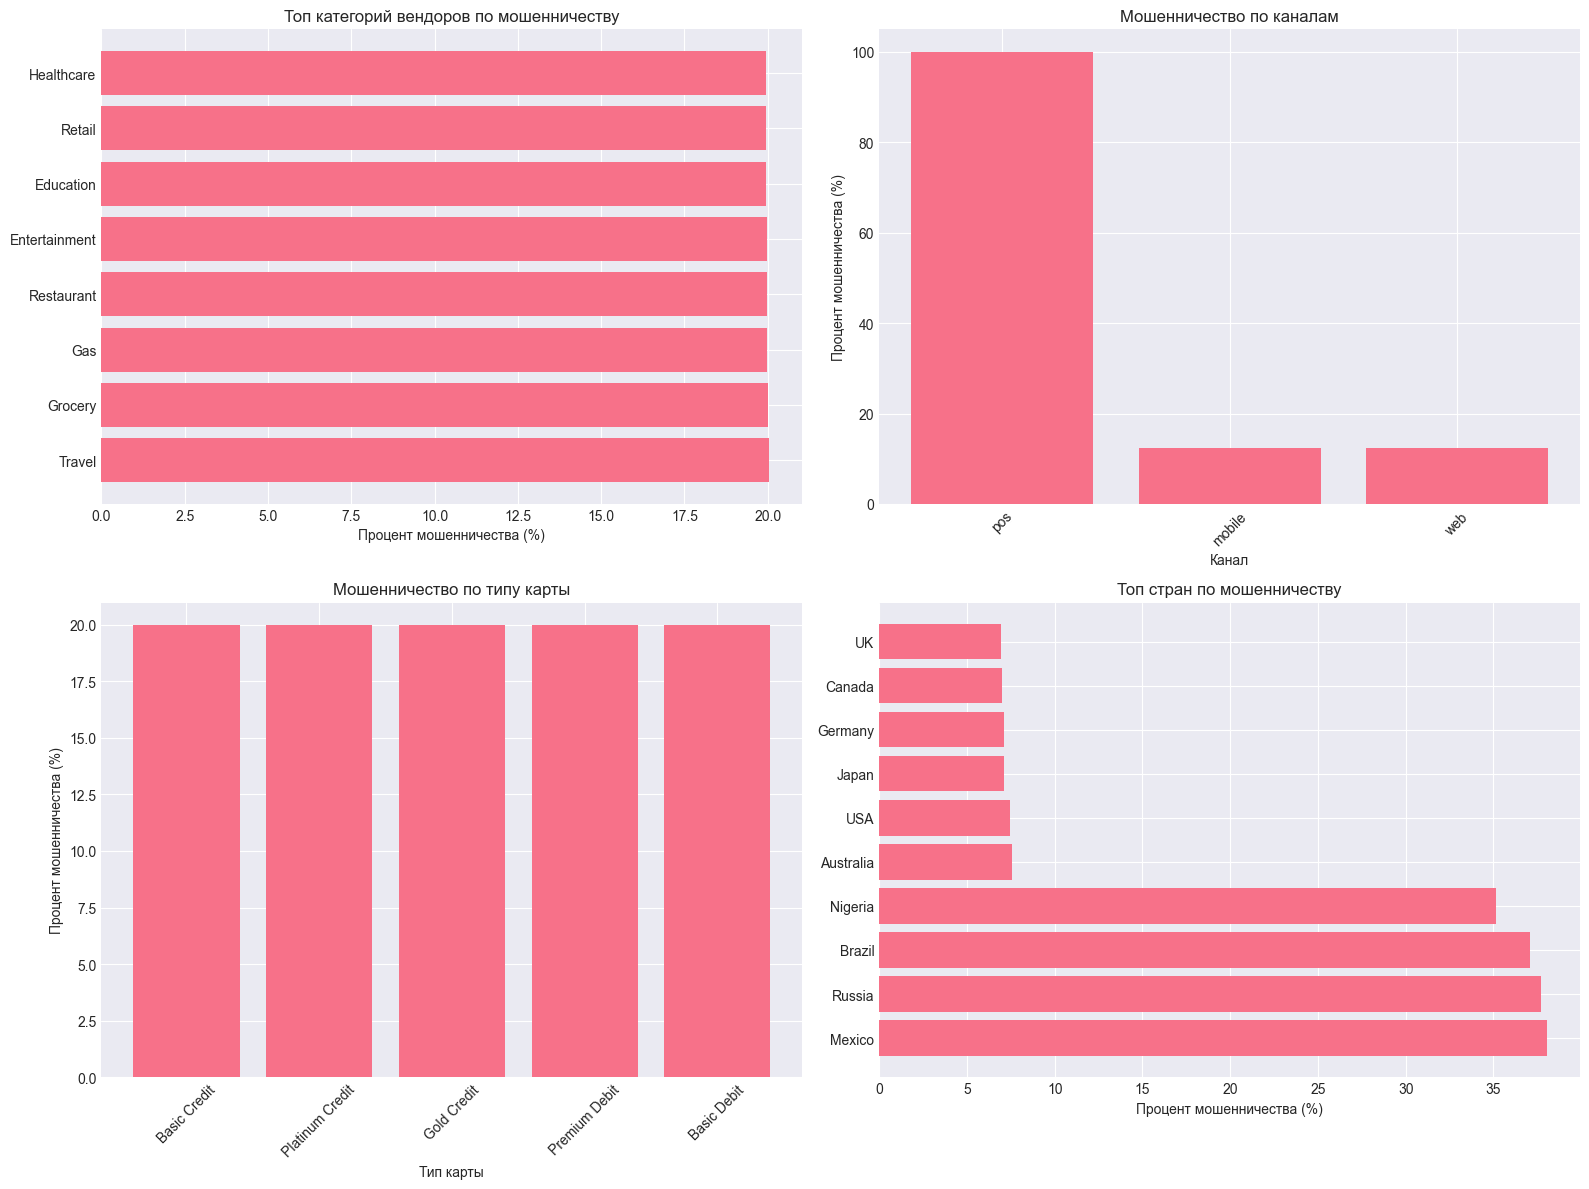


АНАЛИЗ КОРРЕЛЯЦИЙ

Корреляция признаков с is_fraud:
----------------------------------------
is_outside_home_country        : +0.6345
is_card_present                : +0.6179
amount                         : +0.1993
hour                           : -0.2796


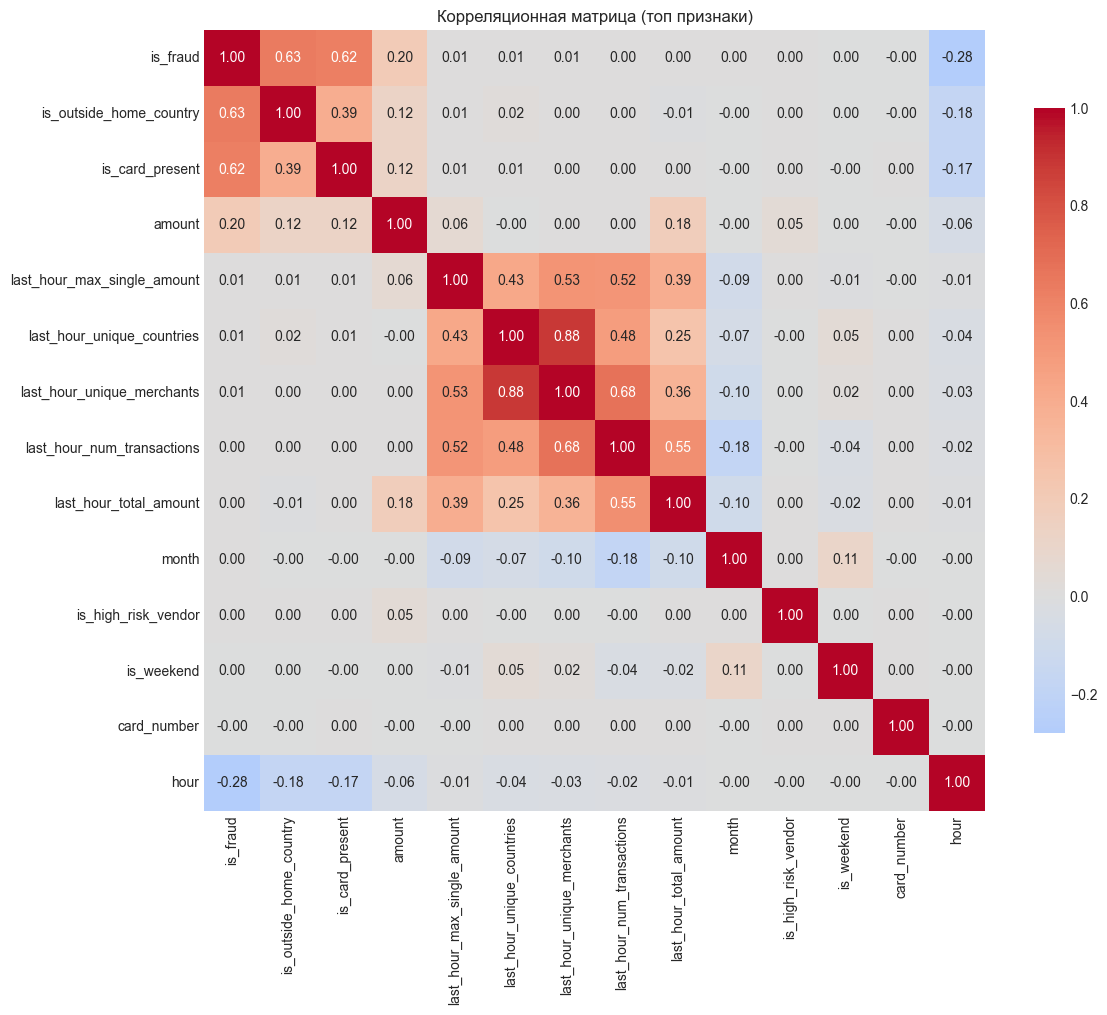


СВОДНЫЙ ОТЧЕТ

ОСНОВНЫЕ ВЫВОДЫ:
----------------------------------------
1. Всего транзакций: 7,483,766
   Мошеннических: 1,494,719 (19.97%)

2. Период данных:
   От: 2024-09-30 до: 2024-10-30
   Всего дней: 31

3. Географический охват:
   Уникальных стран: 12
   Уникальных городов: 11

4. Валюты:
   Уникальных валют в транзакциях: 11
   Валют в курсах обмена: 11

5. Клиенты и карты:
   Уникальных клиентов: 4869
   Уникальных карт: 5000

6. Качество данных:
   Всего пропущенных значений: 0
   Процент пропусков: 0.00%

7. РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:
----------------------------------------

    1. Feature Engineering:
       - Создание новых признаков на основе времени
       - Агрегация по клиентам
       - Нормализация суммы транзакций
    
    2. Подготовка данных для ML:
       - Обработка категориальных признаков (one-hot encoding)
       - Масштабирование числовых признаков
       - Балансировка классов (SMOTE/undersampling)
    
    3. Моделирование:
       - Экспериме

In [ ]:
from eda.eda import (
    load_data,
    basic_info,
    check_missing_values,
    analyze_transaction_features,
    analyze_currency_exchange,
    analyze_last_hour_activity,
    analyze_fraud_patterns,
    correlation_analysis,
    summary_report
)

transactions_df, currency_df = load_data()
    
basic_info(transactions_df, currency_df)
check_missing_values(transactions_df, currency_df)
analyze_transaction_features(transactions_df)
analyze_currency_exchange(currency_df)
analyze_last_hour_activity(transactions_df)
analyze_fraud_patterns(transactions_df)
correlation_analysis(transactions_df)
summary_report(transactions_df, currency_df)

**Какие выводы можно сделать по результатам EDA от нейронки?**

1. Мошеннических транзакций в данных 20% от обшего количества.
2. Мошеннических транзакций в ночное время действительно подавляющее большинство, это полезное знание, можно использовать как фичу в мл модели.
3. По корреляционной матрице с топ признаками видно, что фрод сильно коррелирует из-за границы (мошенники фродят через VPN). Также корреляция с тем, что карта физически не присутствует при оплате (что тоже весьма логично)
4. Мошенничество не зависит от типа карты.
5. Аналитика мошенничества по странам, в топе оказались наименнее экономически развитые страны.
6. Средняя и медианная сумма мошеннических транзакций в несколько раз больше суммы честных транзакций (мошенники оперируют с бОльшими суммами, что логично)
7. Через терминал (POS) совершается 100% мошеннических транзакций, это очень сильный признак

# ml бейзлайн

По результатам работы Логистической Регрессии уже видно, что данные хорошего качества (хорошее значение метрики f1).

In [1]:
from ml_baselines.ml_simple import quick_demo

pipelines = quick_demo()

БЫСТРАЯ ДЕМОНСТРАЦИЯ ML МОДЕЛЕЙ

Обучение моделей...
Logistic Regression: Accuracy = 0.9184, F1-Score = 0.8087

Демонстрация завершена!


In [5]:
pipelines['Logistic Regression']

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [8]:
pipelines['Logistic Regression'].__dict__

{'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['amount', 'is_card_present',
                                     'is_outside_home_country',
                                     'is_high_risk_vendor', 'is_weekend',
                                     'last_hour_num_transactions',
                                     'last_hour_total_amount',
                                     'last_hour_unique_merchants']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['vendor_category', 'vendor_type', 'currency',
                                     'country', 'city_size', 'card_type',
                                     'channel'])])),
  ('classifier', LogisticRegression(class_weight='balanced', max_iter=1000))],
 'transform_input': None,
 'memory': None,
 'verbose': False}

In [15]:
pipelines['Logistic Regression'].steps[1][1]

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# анализ продуктовых гипотез по данным

**Что проверяет каждая гипотеза:**

1) **Гипотеза 1**: Премиум-сегментация
- Идентифицирует клиентов с высоким оборотом, частыми транзакциями за границей и в рискованных категориях
- Оценивает потенциальный доход от премиальных услуг ($10/месяц)

2) **Гипотеза 2**: Динамическое лимитирование
- Сравнивает статические и динамические лимиты
- Оценивает снижение ложных блокировок
- Анализирует влияние на пропущенный фрод

3) **Гипотеза 3**: Проактивные уведомления
- Определяет подозрительные транзакции по правилам
- Оценивает эффект уведомлений на подтверждение транзакций
- Рассчитывает финансовый эффект

4) **Гипотеза 4**: Персонализированный cashback
- Анализирует использование рискованных категорий
- Оценивает эффект cashback 2% на оборот
- Рассчитывает ROI кампании

5) **Гипотеза 5**: Страховка для путешествий
- Сегментирует клиентов по активности за границей
- Оценивает конверсию в страховку
- Рассчитывает потенциальную выручку

ПРОВЕРКА ПРОДУКТОВЫХ ГИПОТЕЗ
Загрузка данных...
Загружено 7483766 транзакций

1. РАСЧЕТ МЕТРИК ЦЕННОСТИ КЛИЕНТА (CLV)...

НАЧАЛО ПРОВЕРКИ ГИПОТЕЗ

ГИПОТЕЗА 1: СЕГМЕНТАЦИЯ ДЛЯ ПРЕМИУМ УСЛУГ
Всего клиентов: 4,869
Кандидатов в премиальный сегмент: 2,969 (61.0%)

Сравнение метрик:
               Метрика  Премиум-кандидаты  Обычные клиенты
        Средний оборот       9.618352e+07     3.846751e+07
    Средняя транзакция       5.907132e+04     2.963408e+04
Транзакций за границей       5.689997e+02     3.793689e+02
   Рисковые транзакции       4.207356e+02     3.277889e+02

Потенциальный дополнительный доход (при 10$/месяц): $356,280/год


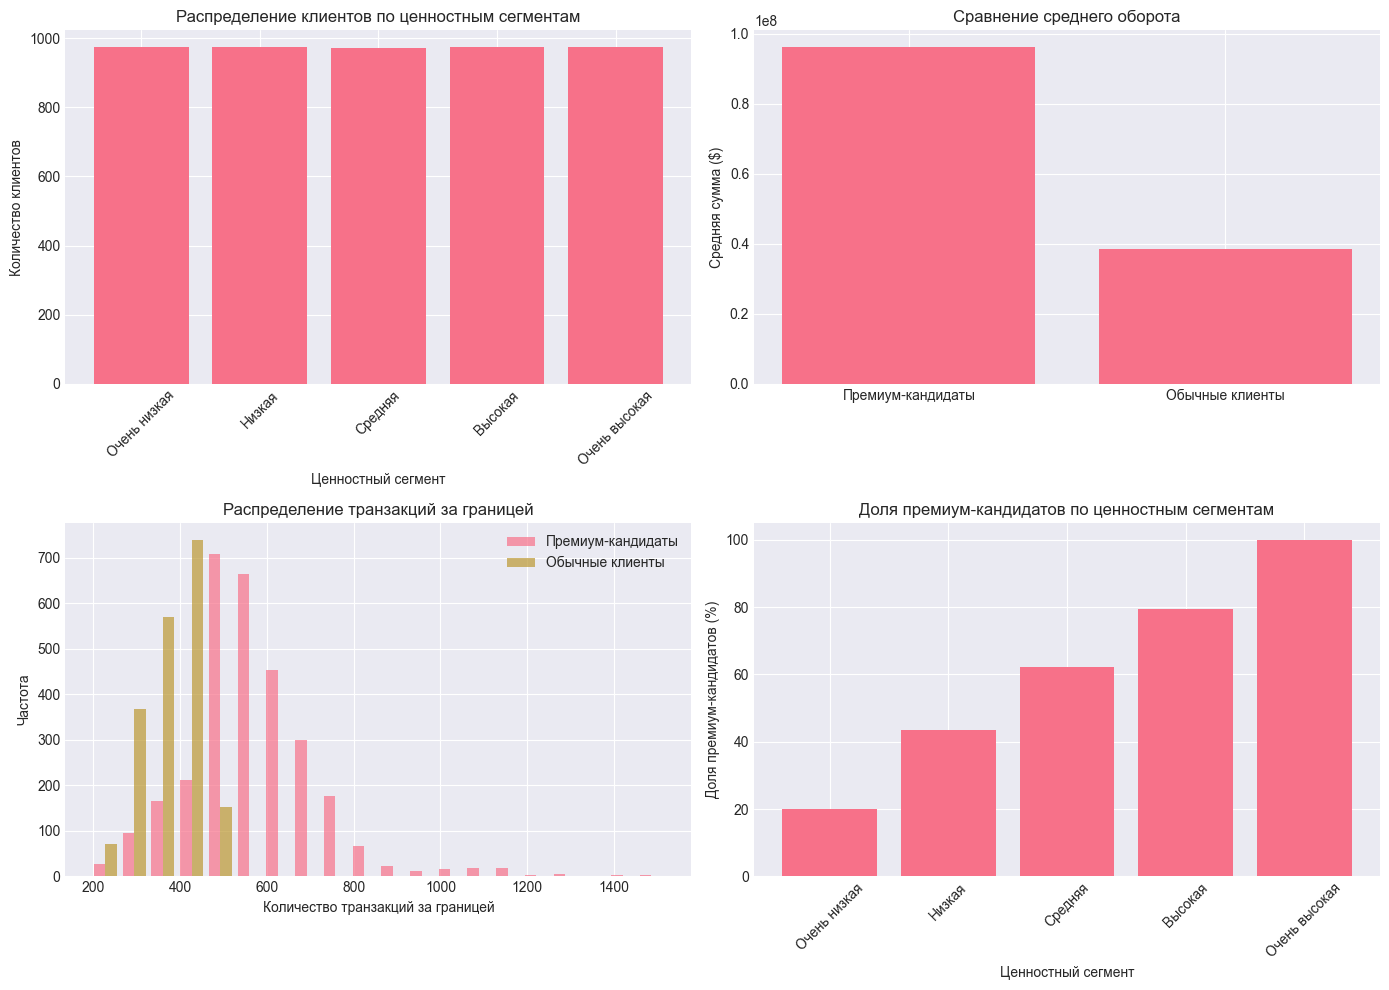


ГИПОТЕЗА 2: ДИНАМИЧЕСКОЕ ЛИМИТИРОВАНИЕ
Статические правила:
  Ложные блокировки: 34 дней (100.0%)
  Дневной лимит: $1,000
  Лимит на транзакцию: $500

Динамические правила:
  Ложные блокировки: 13 дней (38.2%)
  Снижение ложных блокировок: 61.8%

Гипотеза достигнута? True

Анализ пропущенного фрода:
  Статические правила пропускают: 0.0% дней с фродом
  Динамические правила пропускают: 17.6% дней с фродом
  Изменение: +17.6%


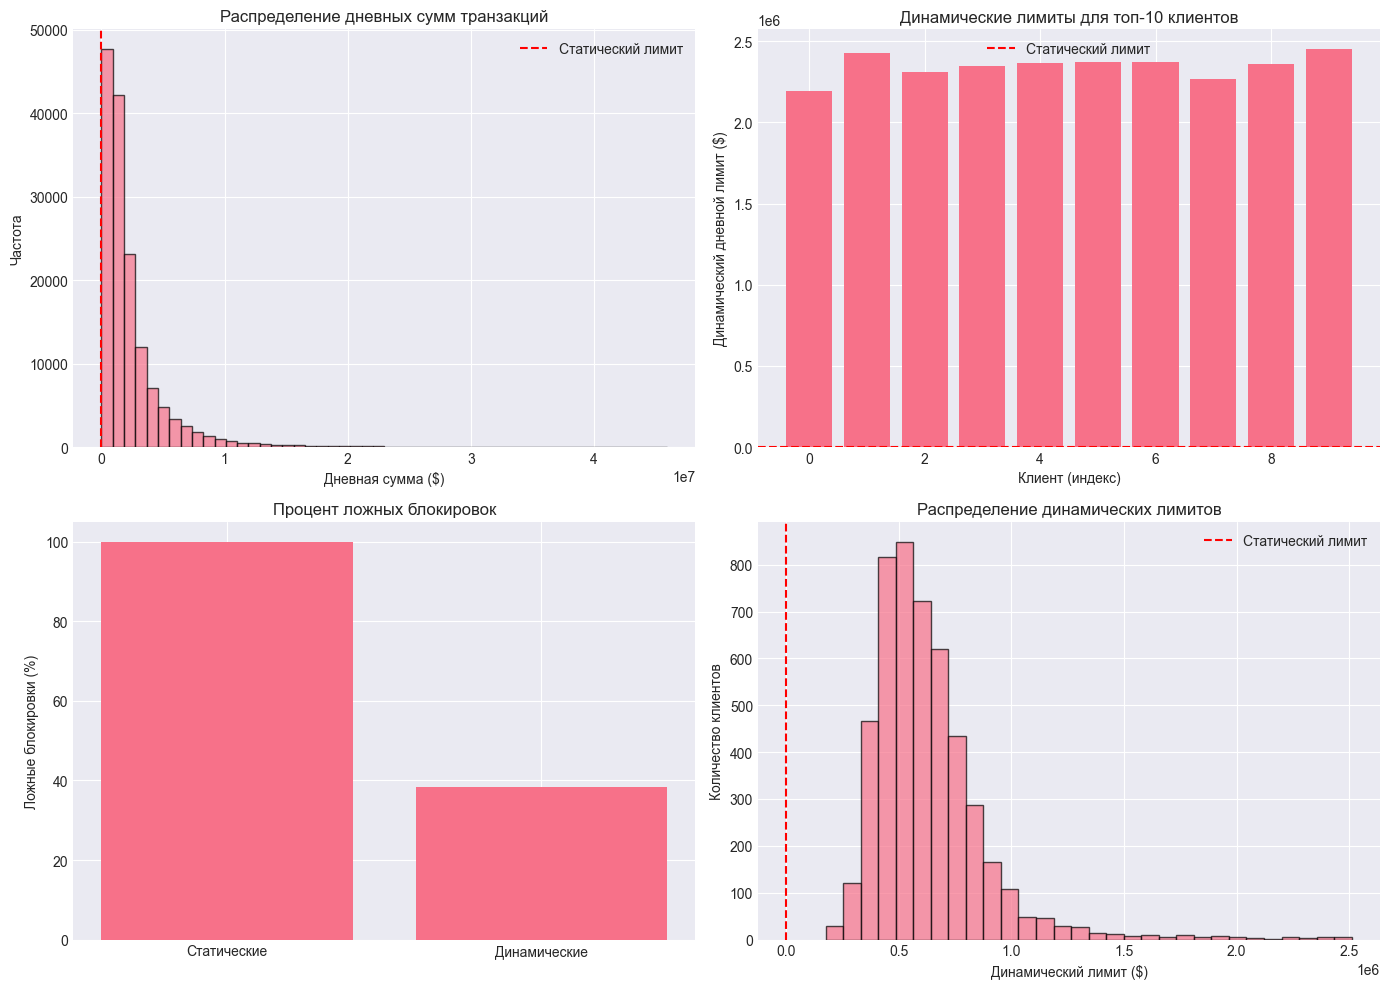


ГИПОТЕЗА 3: ПРОАКТИВНЫЕ УВЕДОМЛЕНИЯ
Всего транзакций: 7,483,766
Подозрительных транзакций: 721,708 (9.6%)
  Из них легитимных: 289,091
  Из них мошеннических: 432,617

Метрики детекции (простые правила):
  Precision (точность): 0.599
  Recall (полнота): 0.289

Гипотетический эффект уведомлений:
  Без уведомлений подтверждается: 202364 легитимных транзакций
  С уведомлениями подтверждается: 283309 легитимных транзакций
  Дополнительно подтверждено: 80945 транзакций
  Увеличение: 40%

Финансовый эффект:
  Средняя сумма транзакции: $43338.89
  Дополнительный оборот: $3,508,087,617.96
  Дополнительный доход (1.5% комиссия): $52,621,314.27


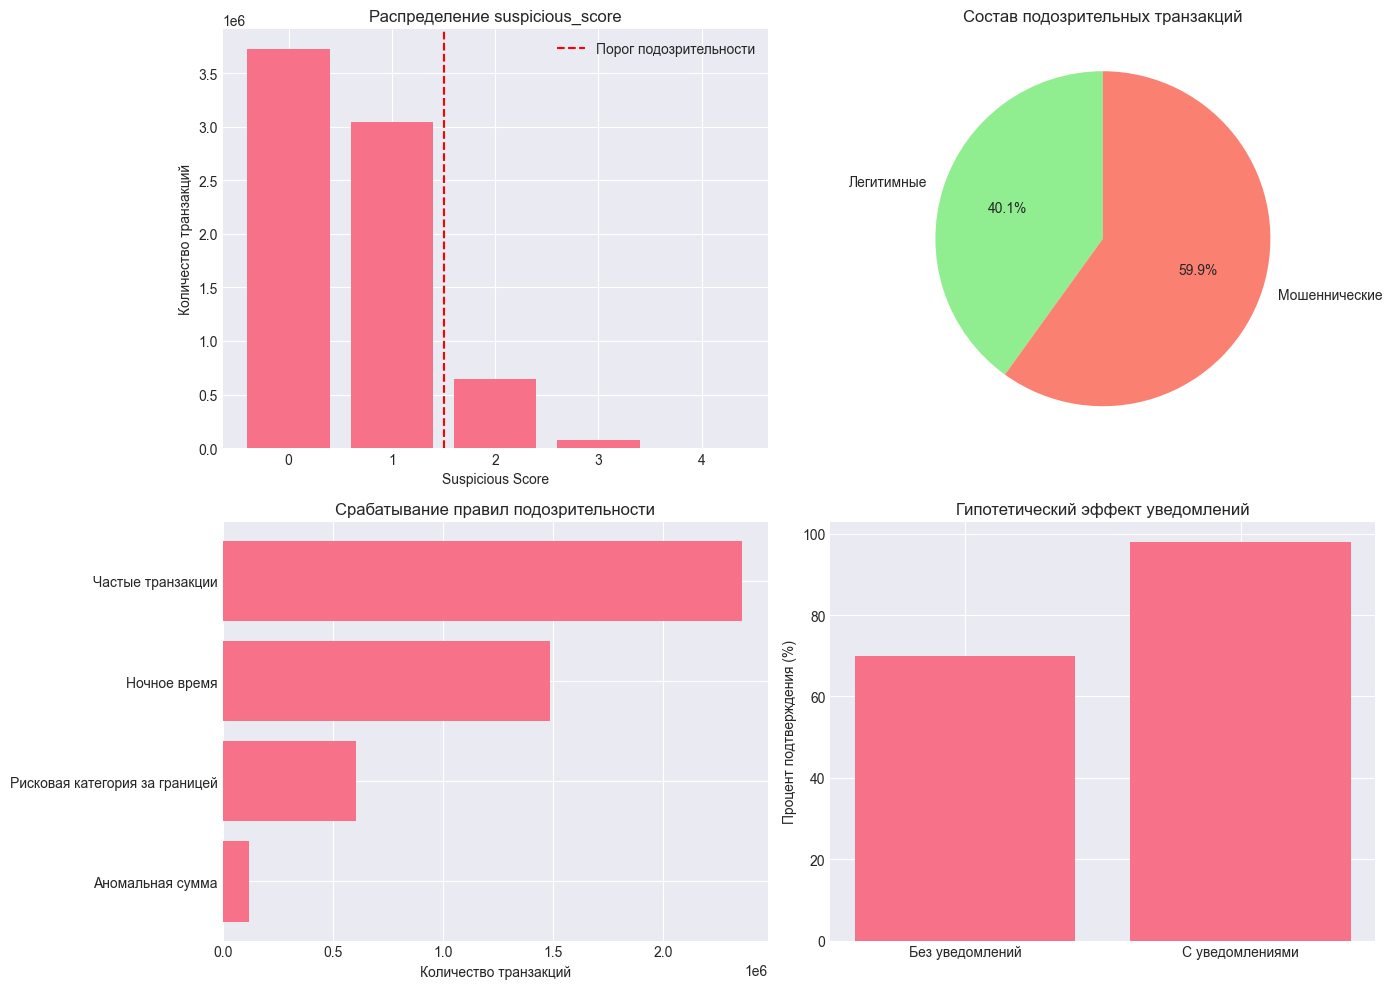


ГИПОТЕЗА 4: ПЕРСОНАЛИЗИРОВАННЫЙ CASHBACK
Всего транзакций: 7,483,766
Транзакций в рискованных категориях: 0 (0.0%)

Статистика по сегментам использования рискованных категорий:
            Сегмент  Количество клиентов  Средний оборот  Средний оборот в риск.категориях  Среднее кол-во транзакций
      Не используют                 4869    7.366135e+07                               0.0                1537.023208
   Слабо используют                    0             NaN                               NaN                        NaN
Умеренно используют                    0             NaN                               NaN                        NaN
 Активно используют                    0             NaN                               NaN                        NaN

Гипотетический эффект cashback 2% для активных пользователей:
  Активных пользователей: 0
  Текущий оборот в риск. категориях: $0.00
  Прогнозируемый оборот (+25%): $0.00
  Дополнительный оборот: $0.00
  Стоимость cashback (2%): $0

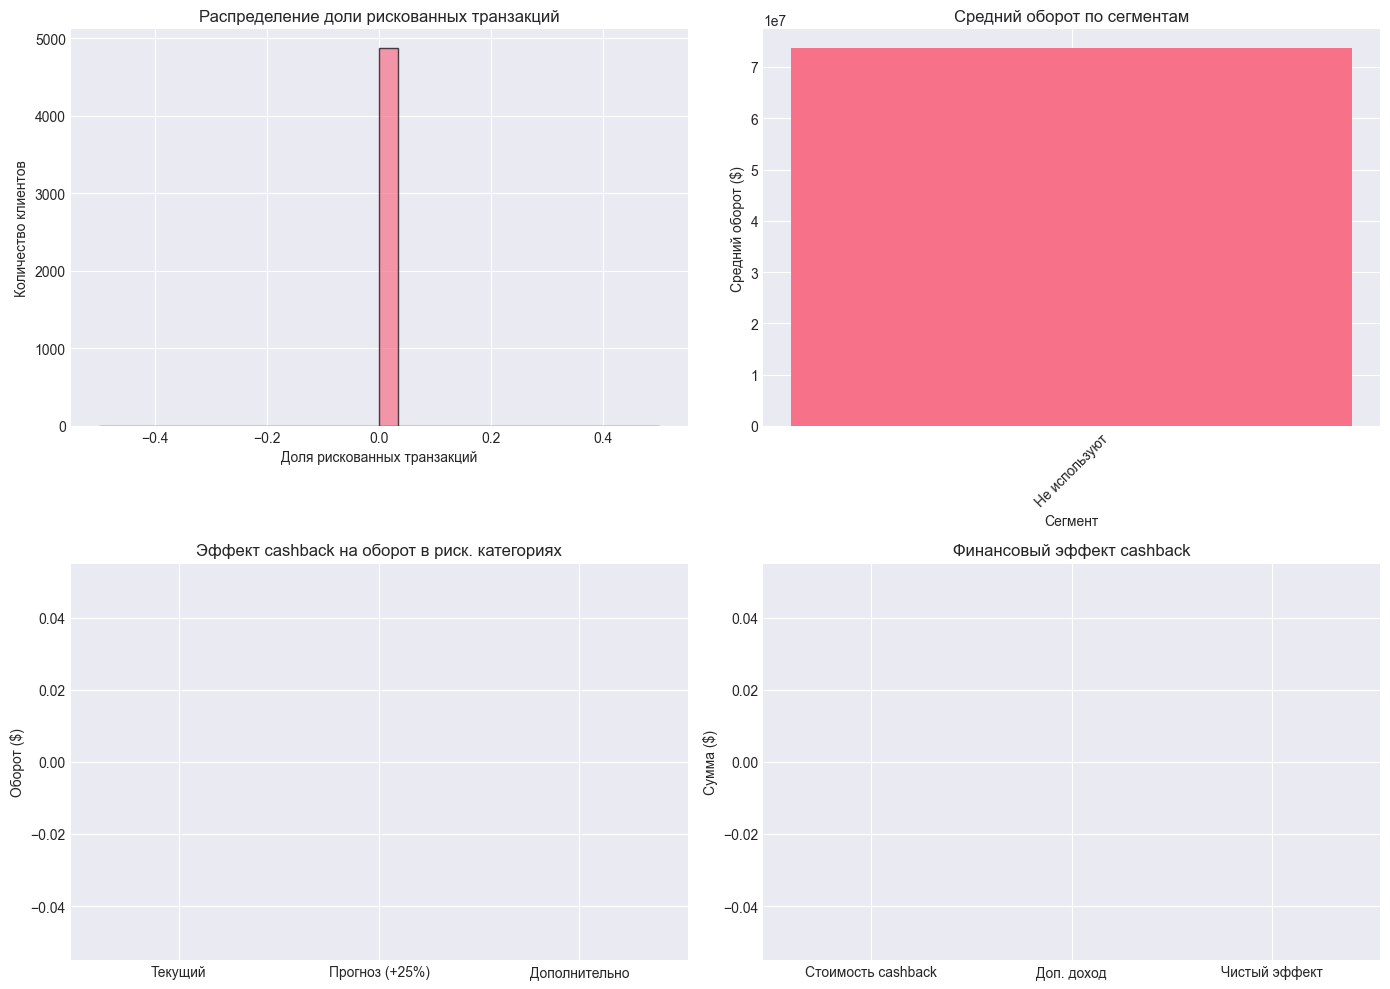


ГИПОТЕЗА 5: СТРАХОВКА ДЛЯ ПУТЕШЕСТВИЙ
Анализ клиентов по активности за границей:
              Сегмент  Количество клиентов  Среднее транзакций за границей  Средний общий оборот  Среднее количество транзакций  Среднее количество стран
      Не путешествует                    0                             NaN                   NaN                            NaN                       NaN
   Редко путешествует                    0                             NaN                   NaN                            NaN                       NaN
Умеренно путешествует                    0                             NaN                   NaN                            NaN                       NaN
   Часто путешествует                 4869                      495.001232          7.366135e+07                    1537.023208                      12.0

Потенциальные продажи страховки ($100/год):
              Сегмент  Клиенты  Конверсия (%)  Ожидаемые продажи  Ожидаемая выручка
      Не путешеству

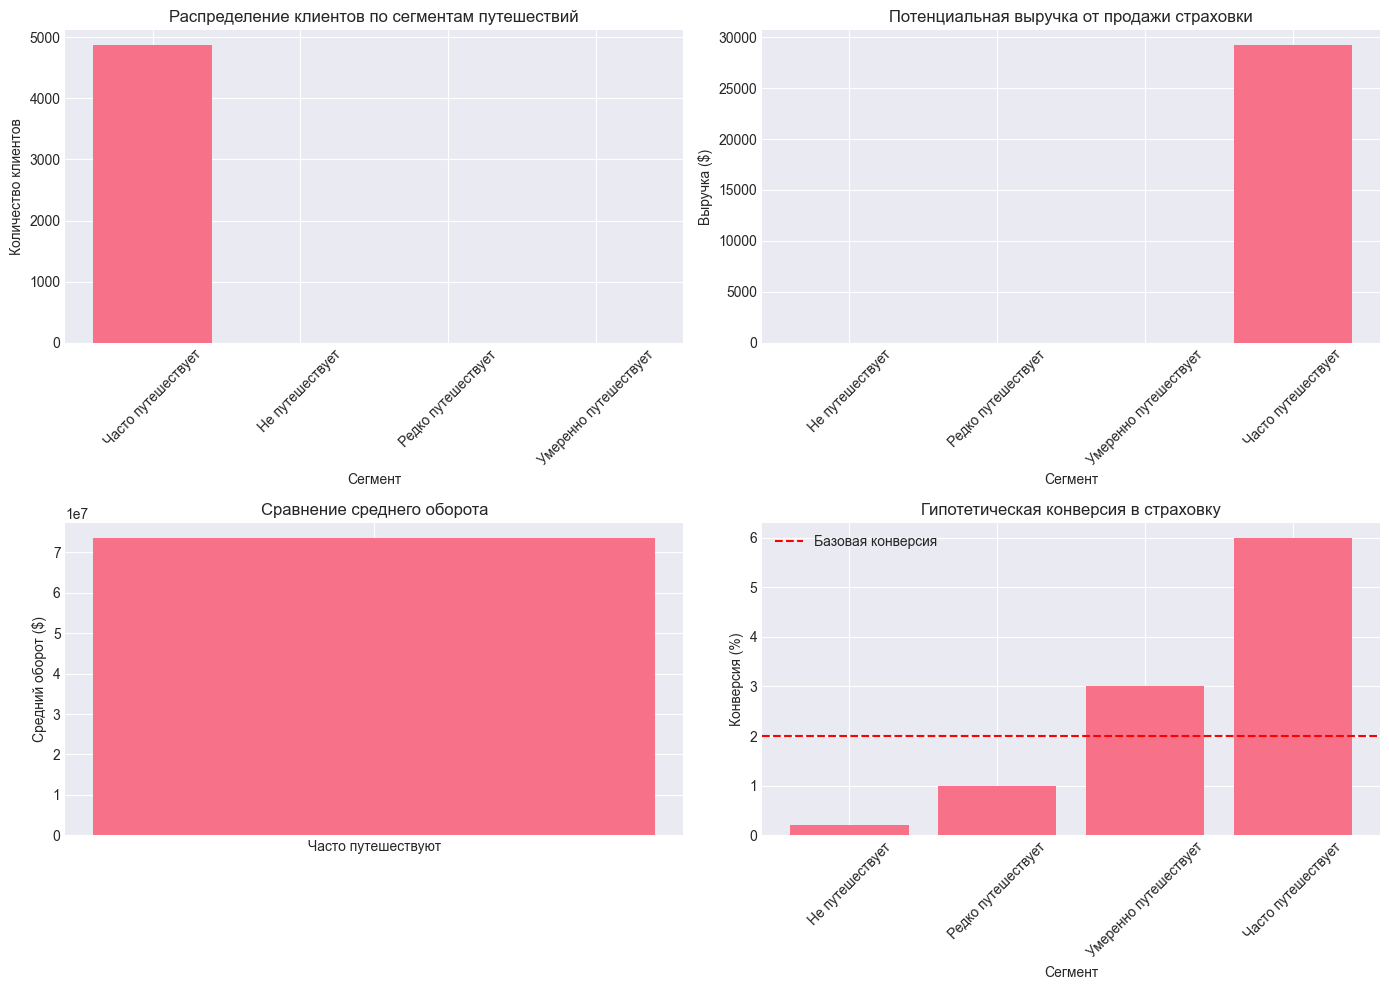


ПРОВЕРКА ГИПОТЕЗ ЗАВЕРШЕНА


In [1]:
from hypothesis.product import main

results = main()

**Какие можно сделать выводы по результатам аналитики от нейронки?**

1. Гипотеза 1 